# Books Recommendation System

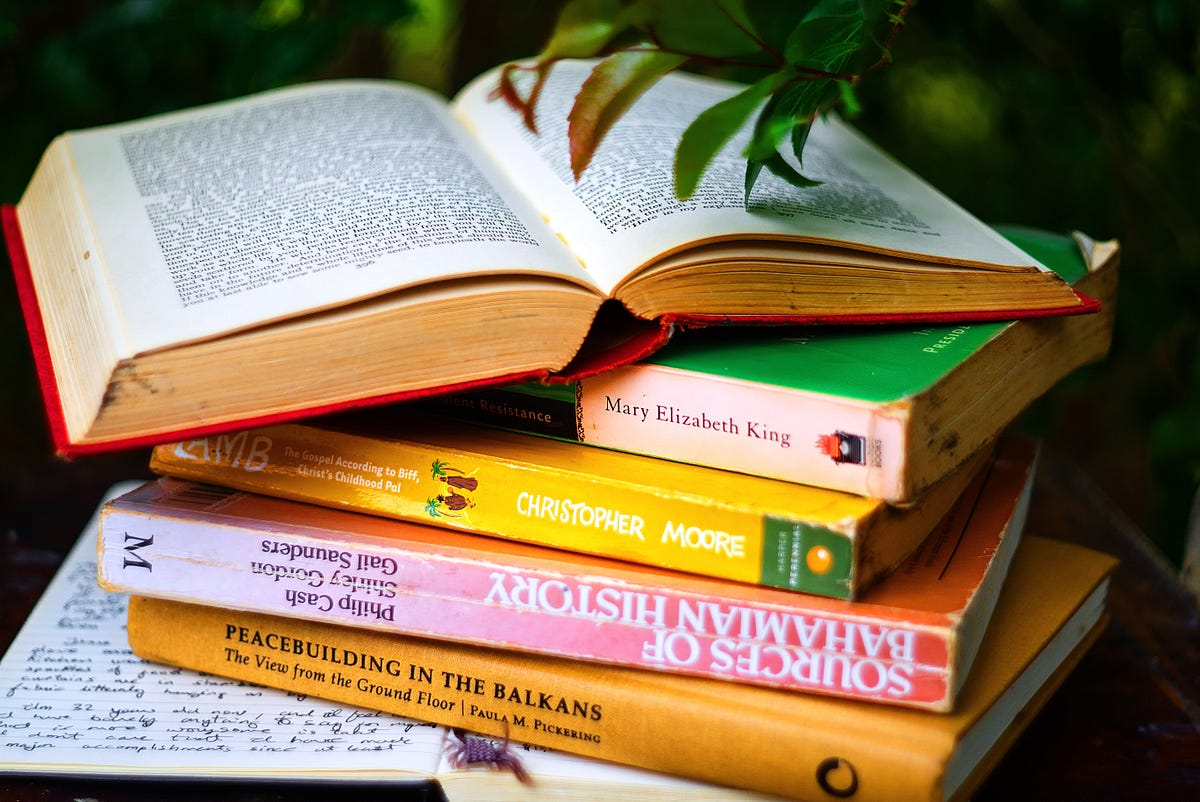

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import ast

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Loading the dataset

In [2]:
data = pd.read_csv("../datasets/Books data/goodreads_data.csv", index_col="Unnamed: 0")

In [3]:
data.head()

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [4]:
data.shape

(10000, 7)

In [5]:
df = data[["Book", "Author", "Description", "Genres"]]

In [6]:
df.head()

,Book,Author,Description,Genres
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Book         10000 non-null  object
 1   Author       10000 non-null  object
 2   Description  9923 non-null   object
 3   Genres       10000 non-null  object
dtypes: object(4)
memory usage: 390.6+ KB


In [8]:
df.isnull().sum()

Book            0
Author          0
Description    77
Genres          0
dtype: int64

In [9]:
# Dropping null values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Book         9923 non-null   object
 1   Author       9923 non-null   object
 2   Description  9923 non-null   object
 3   Genres       9923 non-null   object
dtypes: object(4)
memory usage: 387.6+ KB


## Collapsing Author into a string.

In [11]:
df["Author"] = df["Author"].apply(lambda x:[x.replace(" ","")])

In [12]:
df.head()

,Book,Author,Description,Genres
0,To Kill a Mockingbird,[HarperLee],The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,[J.K.Rowling],Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,[JaneAusten],"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,[AnneFrank],Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,[GeorgeOrwell],Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."


## Converting Description Column into a list

In [13]:
df["Description"] = df["Description"].apply(lambda x: x.split())

In [14]:
df.head()

,Book,Author,Description,Genres
0,To Kill a Mockingbird,[HarperLee],"[The, unforgettable, novel, of, a, childhood, ...","['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,[J.K.Rowling],"[Harry, Potter, thinks, he, is, an, ordinary, ...","['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,[JaneAusten],"[Since, its, immediate, success, in, 1813,, Pr...","['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,[AnneFrank],"[Discovered, in, the, attic, in, which, she, s...","['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,[GeorgeOrwell],"[Librarian's, note:, There, is, an, Alternate,...","['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."


## Removing "'" from Genres

In [15]:
df["Genres"][0]

"['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical']"

In [16]:
def convert(text):
    output_list = ast.literal_eval(text)
    output_list = [item.replace("'", "") for item in output_list] 
    return output_list[:3]

In [17]:
df["Genres"] = df["Genres"].apply(convert)

## Combining Author, Description, Genre into tags

In [18]:
print(df["Book"][0])
print("****"*30)
print(df["Author"][0])
print("****"*30)
print(df["Description"][0])
print("****"*30)
print(df["Genres"][0])
print("****"*30)

To Kill a Mockingbird
************************************************************************************************************************
['HarperLee']
************************************************************************************************************************
['The', 'unforgettable', 'novel', 'of', 'a', 'childhood', 'in', 'a', 'sleepy', 'Southern', 'town', 'and', 'the', 'crisis', 'of', 'conscience', 'that', 'rocked', 'it.', '"To', 'Kill', 'A', 'Mockingbird"', 'became', 'both', 'an', 'instant', 'bestseller', 'and', 'a', 'critical', 'success', 'when', 'it', 'was', 'first', 'published', 'in', '1960.', 'It', 'went', 'on', 'to', 'win', 'the', 'Pulitzer', 'Prize', 'in', '1961', 'and', 'was', 'later', 'made', 'into', 'an', 'Academy', 'Award-winning', 'film,', 'also', 'a', 'classic.Compassionate,', 'dramatic,', 'and', 'deeply', 'moving,', '"To', 'Kill', 'A', 'Mockingbird"', 'takes', 'readers', 'to', 'the', 'roots', 'of', 'human', 'behavior', '-', 'to', 'innocence', 'and', 'ex

In [19]:
tags = pd.DataFrame(df["Description"] + df["Author"] + df["Genres"])

In [20]:
tags = tags[0].apply(lambda x: " ".join(x))

In [21]:
tags

0       The unforgettable novel of a childhood in a sl...
1       Harry Potter thinks he is an ordinary boy - un...
2       Since its immediate success in 1813, Pride and...
3       Discovered in the attic in which she spent the...
4       Librarian's note: There is an Alternate Cover ...
                              ...                        
9995    How far would you go? If human society was gen...
9996    Jeth Cavanaugh is searching for a new life alo...
9997    This dark fable tells the story of four Englis...
9998    For Adriana Monroe life couldn’t get any bette...
9999    After demands of thousands of fans in various ...
Name: 0, Length: 9923, dtype: object

## Bag of words (BOW) - Feature extraction/engineering method

In [22]:
# apply stopwords and also give hard coded feature value - 5000
cv = CountVectorizer(stop_words='english', max_features=5000)
vector = cv.fit_transform(tags).toarray()
vector.shape

(9923, 5000)

## Building Recommendation system

In [23]:
similarity = cosine_similarity(vector)

In [24]:
def recommend(book,num_of_recommendations=5):
    index = df[df['Book']==book].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
    
    for i in distances[1:num_of_recommendations+1]:
        print(df.iloc[i[0]].Book)

In [25]:
recommend('To Kill a Mockingbird')

Lonesome Dove (Lonesome Dove, #1)
Harper Lee's To Kill a Mockingbird
Go Set a Watchman
Beautiful Ruins
The Painted Bird


In [26]:
recommend('Pride and Prejudice')

The Complete Novels
Austenland (Austenland, #1)
Pride and Prejudice and Zombies (Pride and Prejudice and Zombies, #1)
Pride and Prejudice, Mansfield Park, Persuasion
The Speed of Life
